In [75]:
import numpy as np
import pandas as pd
from warnings import filterwarnings
filterwarnings('ignore')
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

import seaborn as sns
from matplotlib import font_manager, rc
font_name = font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
rc('font', family=font_name)
import matplotlib.pyplot as plt
%matplotlib inline

In [76]:
df = pd.read_csv('./data/부산/부산신항_발전량.csv', encoding='euc-kr') # 부산 관측소와의 거리 : 18.3km
df.shape
df.head()

(2882, 10)

,일시,최저기온(°C),최고기온(°C),일강수량(mm),평균 풍속(m/s),평균 상대습도(%),가조시간(hr),합계 일사량(MJ/m2),평균 전운량(1/10),총량(kw)
0,2013-01-01,-2.8,8.0,NaN,3.1,48.5,9.9,8.99,3.4,220.044
1,2013-01-02,-5.9,3.6,NaN,4.0,40.9,9.9,10.30,1.5,246.036
2,2013-01-03,-7.7,-1.0,NaN,3.9,26.3,9.9,10.77,2.8,249.252
3,2013-01-04,-8.1,2.8,NaN,3.7,24.6,9.9,11.36,0.3,259.944
4,2013-01-05,-3.8,3.4,NaN,3.4,26.4,9.9,11.14,0.8,253.584


In [77]:
#df.drop(['일강수량(mm)'], axis=1, inplace=True) # 결측치가 많은 일강수량 제거

In [78]:
df.describe()

,최저기온(°C),최고기온(°C),일강수량(mm),평균 풍속(m/s),평균 상대습도(%),가조시간(hr),합계 일사량(MJ/m2),평균 전운량(1/10),총량(kw)
count,2769.000000,2769.000000,899.000000,2768.000000,2769.000000,2769.000000,2696.000000,2769.000000,2769.000000
mean,12.025424,19.490321,13.320690,3.164451,63.362586,12.229577,14.553190,4.793391,317.920938
std,8.701013,7.741368,25.088904,1.150692,18.232092,1.633822,7.233134,3.301401,172.767743
min,-10.700000,-4.200000,0.000000,0.300000,17.000000,9.800000,0.170000,0.000000,0.000000
25%,4.700000,13.000000,0.300000,2.400000,49.300000,10.600000,9.547500,1.800000,198.360000
50%,12.800000,20.500000,2.600000,3.000000,64.900000,12.300000,13.860000,4.600000,304.560000
75%,19.300000,25.700000,14.550000,3.700000,77.600000,13.800000,20.207500,7.800000,459.936000
max,28.300000,37.300000,264.100000,10.100000,99.900000,14.500000,34.680000,10.000000,675.360000


In [79]:
from statsmodels.formula.api import ols

In [80]:
df.isnull().sum()

일시                113
최저기온(°C)          113
최고기온(°C)          113
일강수량(mm)         1983
평균 풍속(m/s)        114
평균 상대습도(%)        113
가조시간(hr)          113
합계 일사량(MJ/m2)     186
평균 전운량(1/10)      113
총량(kw)            113
dtype: int64

In [81]:
df.dropna(axis=0, how='any', inplace=True)

In [82]:
df.shape
df.head()

(866, 10)

,일시,최저기온(°C),최고기온(°C),일강수량(mm),평균 풍속(m/s),평균 상대습도(%),가조시간(hr),합계 일사량(MJ/m2),평균 전운량(1/10),총량(kw)
16,2013-01-17,-2.0,5.1,0.0,3.2,48.9,10.1,8.34,2.9,186.768
20,2013-01-21,7.1,9.0,20.5,2.4,83.3,10.2,0.76,10.0,5.172
21,2013-01-22,5.3,9.0,2.0,3.3,76.0,10.2,4.09,10.0,98.280
31,2013-02-01,9.5,13.4,25.5,4.9,84.6,10.5,0.25,8.3,18.096
33,2013-02-03,0.4,9.0,1.0,1.9,48.4,10.5,7.60,7.0,177.588


In [83]:
df.isnull().sum()

일시               0
최저기온(°C)         0
최고기온(°C)         0
일강수량(mm)         0
평균 풍속(m/s)       0
평균 상대습도(%)       0
가조시간(hr)         0
합계 일사량(MJ/m2)    0
평균 전운량(1/10)     0
총량(kw)           0
dtype: int64

<Figure size 720x576 with 0 Axes>

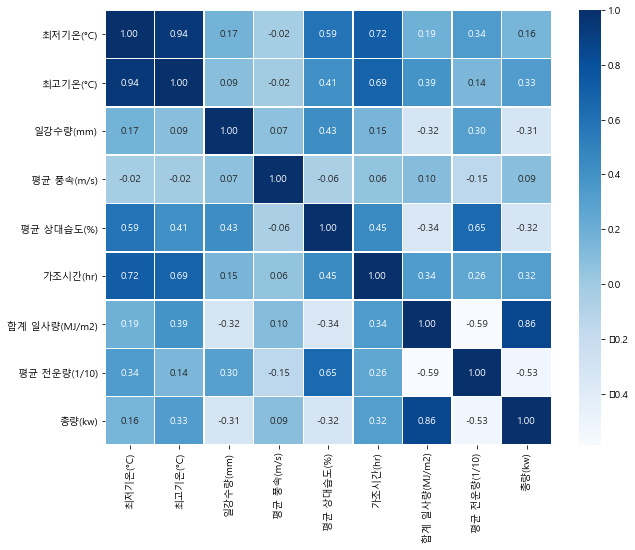

In [84]:
plt.figure(figsize=(10,8))
sns.heatmap(data=df.corr(), annot=True,
fmt='.2f', linewidths=.5, cmap='Blues')

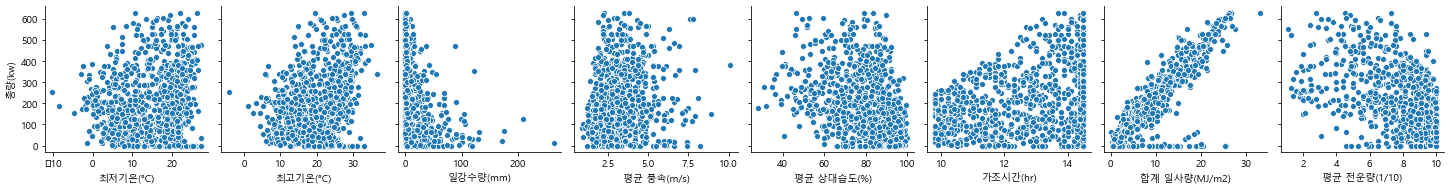

In [85]:
sns.pairplot(df, x_vars=['최저기온(°C)', '최고기온(°C)', '일강수량(mm)', '평균 풍속(m/s)', '평균 상대습도(%)',
       '가조시간(hr)', '합계 일사량(MJ/m2)', '평균 전운량(1/10)'],y_vars=['총량(kw)'])
#sns.pairplot(df, x_vars=['최저기온(°C)', '최고기온(°C)', '평균 풍속(m/s)', '평균 상대습도(%)',
#       '가조시간(hr)', '합계 일사량(MJ/m2)', '평균 전운량(1/10)'],y_vars=['총량(kw)'])

In [86]:
df.head()

,일시,최저기온(°C),최고기온(°C),일강수량(mm),평균 풍속(m/s),평균 상대습도(%),가조시간(hr),합계 일사량(MJ/m2),평균 전운량(1/10),총량(kw)
16,2013-01-17,-2.0,5.1,0.0,3.2,48.9,10.1,8.34,2.9,186.768
20,2013-01-21,7.1,9.0,20.5,2.4,83.3,10.2,0.76,10.0,5.172
21,2013-01-22,5.3,9.0,2.0,3.3,76.0,10.2,4.09,10.0,98.280
31,2013-02-01,9.5,13.4,25.5,4.9,84.6,10.5,0.25,8.3,18.096
33,2013-02-03,0.4,9.0,1.0,1.9,48.4,10.5,7.60,7.0,177.588


### 최소자승법 OLS를 적용한 회귀분석

In [87]:
from statsmodels.formula.api import ols

In [88]:
# X = df.drop(['일시', ,'총량(kw)'], axis='columns')
X = df[['합계 일사량(MJ/m2)']]
y = df['총량(kw)']
res = ols('y ~ X', data=df).fit()

In [89]:
X.head()
X.shape
y.head()
y.shape

,합계 일사량(MJ/m2)
16,8.34
20,0.76
21,4.09
31,0.25
33,7.60


(866, 1)

16    186.768
20      5.172
21     98.280
31     18.096
33    177.588
Name: 총량(kw), dtype: float64

(866,)

In [90]:
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.743
Model:                            OLS   Adj. R-squared:                  0.743
Method:                 Least Squares   F-statistic:                     2497.
Date:                Sun, 22 Nov 2020   Prob (F-statistic):          4.51e-257
Time:                        20:17:55   Log-Likelihood:                -4974.2
No. Observations:                 866   AIC:                             9952.
Df Residuals:                     864   BIC:                             9962.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     15.9691      4.569      3.495      0.000       7.002      24.936
X             20.5740      0.412     49.967      0.000      19.766      21.382
==============================================================================
Omnibus:                      560.339   Durbin-Watson:                   1.409
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             7949.662
Skew:                          -2.738   Prob(JB):                         0.00
Kurtosis:                      16.796   Cond. No.                         19.8
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [91]:
X = df.drop(['일시', '총량(kw)'], axis='columns')
y = df['총량(kw)']
res = ols('y ~ X', data=df).fit()

In [92]:
X.isnull().sum()

최저기온(°C)         0
최고기온(°C)         0
일강수량(mm)         0
평균 풍속(m/s)       0
평균 상대습도(%)       0
가조시간(hr)         0
합계 일사량(MJ/m2)    0
평균 전운량(1/10)     0
dtype: int64

In [93]:
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.751
Model:                            OLS   Adj. R-squared:                  0.749
Method:                 Least Squares   F-statistic:                     322.8
Date:                Sun, 22 Nov 2020   Prob (F-statistic):          1.36e-252
Time:                        20:17:58   Log-Likelihood:                -4960.6
No. Observations:                 866   AIC:                             9939.
Df Residuals:                     857   BIC:                             9982.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -17.6353     35.777     -0.493      0.622     -87.856      52.585
X[0]           0.3616      1.580      0.229      0.819      -2.740       3.463
X[1]          -0.7606      1.621     -0.469      0.639      -3.942       2.421
X[2]          -0.3115      0.116     -2.674      0.008      -0.540      -0.083
X[3]           0.2943      1.987      0.148      0.882      -3.605       4.193
X[4]          -0.3980      0.310     -1.282      0.200      -1.007       0.211
X[5]          11.1041      2.711      4.096      0.000       5.783      16.425
X[6]          18.1573      0.774     23.465      0.000      16.639      19.676
X[7]          -4.9134      1.988     -2.472      0.014      -8.815      -1.012
==============================================================================
Omnibus:                      558.511   Durbin-Watson:                   1.440
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             7679.519
Skew:                          -2.738   Prob(JB):                         0.00
Kurtosis:                      16.522   Cond. No.                     1.21e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.21e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""